In [4]:
from google.colab import drive 

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install prophet

In [17]:
import pandas as pd 
from prophet import Prophet
data = pd.read_csv("/content/drive/My Drive/rossdata/train.csv",nrows=3500)
#I limited the number of rows to reduce the time taken to processs the data

In [18]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [19]:
#select necessary columns for prophet
prophet_df = data[['Date','Sales']]

#rename columns for prophet
prophet_df.columns = ['ds','y']

In [20]:
prophet_df

,ds,y
0,2015-07-31,5263
1,2015-07-31,6064
2,2015-07-31,8314
3,2015-07-31,13995
4,2015-07-31,4822
...,...,...
3495,2015-07-28,7352
3496,2015-07-28,6527
3497,2015-07-28,6690
3498,2015-07-28,10025


In [21]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
#make predictions for the next 6 weeks
future = m.make_future_dataframe(periods=42)
future.tail()

,ds
41,2015-09-07
42,2015-09-08
43,2015-09-09
44,2015-09-10
45,2015-09-11


In [28]:
#predicted value is th yhat and other columns are for uncertainity levels
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
41,2015-09-07,52592.347642,16465.315531,88314.319197
42,2015-09-08,53738.148607,16374.907224,90483.942516
43,2015-09-09,54883.949572,16585.247860,93748.523101
44,2015-09-10,56029.750536,14828.435141,97048.845704
45,2015-09-11,57175.551501,15729.371507,98448.369812


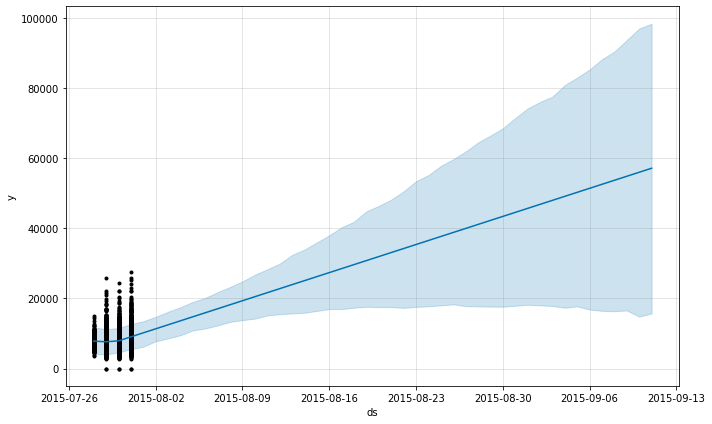

In [31]:
#plot the forecast
fig1 = m.plot(forecast)

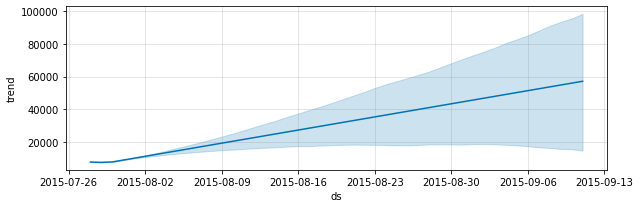

In [32]:
#ploting forcast trend component
fig2 = m.plot_components(forecast)